In [1]:
import pandas as pd
from glob import glob

pd.set_option('display.max_columns', None)

csv_files = glob("./log/*.csv")
df = pd.concat([pd.read_csv(i) for i in csv_files])
df.set_index('Unnamed: 0', inplace=True, drop=True )
df.index.name = 'time_str'
df.set_index(pd.to_datetime(df.index, format='%Y-%m-%d %H:%M:%S')).sort_index()
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
Index: 64599 entries, 2022-02-06 20:23:05 to 2022-02-13 21:15:16
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Bybit_ask           64599 non-null  float64
 1   Bybit_bid           64599 non-null  float64
 2   Bybit_tiker         64599 non-null  float64
 3   Binance_ask         64599 non-null  float64
 4   Binance_bid         64599 non-null  float64
 5   Binance_tiker       64599 non-null  float64
 6   Coinbase Pro_ask    64599 non-null  float64
 7   Coinbase Pro_bid    64599 non-null  float64
 8   Coinbase Pro_tiker  64599 non-null  float64
 9   FTX_ask             64599 non-null  float64
 10  FTX_bid             64599 non-null  float64
 11  FTX_tiker           64599 non-null  float64
dtypes: float64(12)
memory usage: 6.4+ MB
None
                     Bybit_ask  Bybit_bid  Bybit_tiker  Binance_ask  \
time_str                                                    

In [2]:
df_tiker = pd.DataFrame(index=df.index, columns=['Bybit', 'Binance', 'Coinbase Pro', 'FTX'])
df_tiker['Bybit'] = df['Bybit_tiker']
df_tiker['Binance'] = df['Binance_tiker']
df_tiker['Coinbase Pro'] = df['Coinbase Pro_tiker']
df_tiker['FTX'] = df['FTX_tiker']

df_tiker['index'] = df_tiker.index

print(df_tiker)

                       Bybit   Binance  Coinbase Pro      FTX  \
time_str                                                        
2022-02-06 20:23:05  41506.5  41534.29      41529.84  41538.0   
2022-02-06 20:23:12  41506.0  41534.29      41529.84  41533.0   
2022-02-06 20:23:19  41506.5  41536.54      41540.44  41533.0   
2022-02-06 20:23:26  41506.5  41536.99      41540.44  41533.0   
2022-02-06 20:23:34  41506.5  41539.16      41540.44  41533.0   
...                      ...       ...           ...      ...   
2022-02-13 21:14:43  42527.5  42541.27      42557.49  42547.0   
2022-02-13 21:14:52  42528.0  42541.26      42557.49  42547.0   
2022-02-13 21:15:00  42528.0  42545.74      42557.49  42543.0   
2022-02-13 21:15:08  42528.0  42546.29      42557.49  42543.0   
2022-02-13 21:15:16  42527.5  42549.68      42557.49  42543.0   

                                   index  
time_str                                  
2022-02-06 20:23:05  2022-02-06 20:23:05  
2022-02-06 20:23:12  2022

<AxesSubplot:xlabel='time_str'>

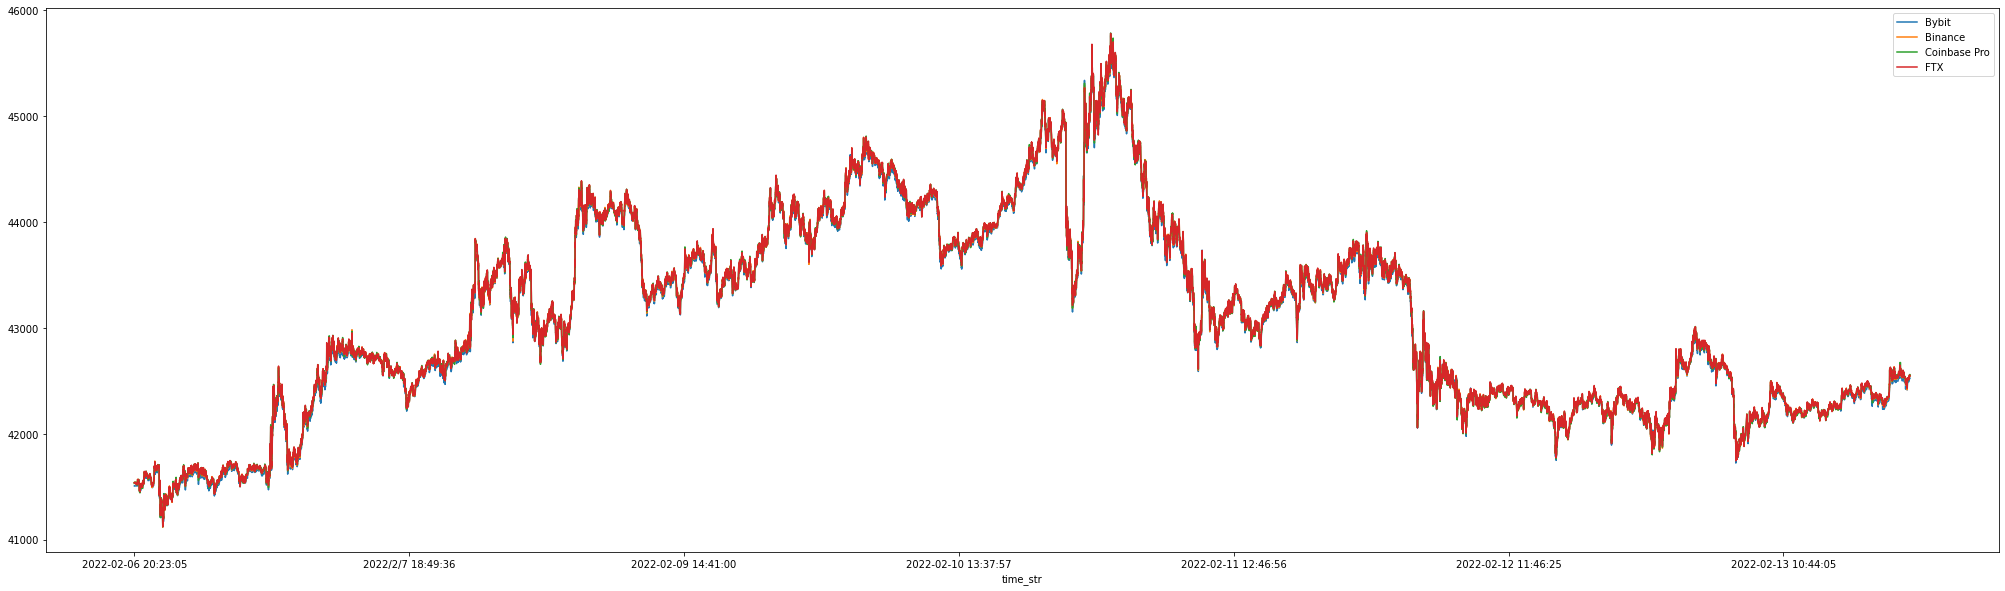

In [3]:
df_tiker.plot(figsize=(35,10))

In [5]:
df_rates = df.drop(['Binance_tiker', 'Coinbase Pro_tiker', 'FTX_tiker'], axis='columns')
df_rates = df_rates.drop(['Bybit_bid', 'Binance_bid', 'Coinbase Pro_bid', 'FTX_bid'], axis='columns')
print(df_rates)

                     Bybit_ask  Bybit_tiker  Binance_ask  Coinbase Pro_ask  \
time_str                                                                     
2022-02-06 20:23:05   0.448593      41506.5     0.072771          0.466680   
2022-02-06 20:23:12   0.427346      41506.0     0.128601          0.467760   
2022-02-06 20:23:19   0.258243      41506.5     0.162015          0.511329   
2022-02-06 20:23:26   0.297960      41506.5     0.224664          0.508232   
2022-02-06 20:23:34   0.308913      41506.5     0.445062          0.508232   
...                        ...          ...          ...               ...   
2022-02-13 21:14:43   0.634382      42527.5     0.685981          0.518425   
2022-02-13 21:14:52   0.687665      42528.0     0.579348          0.494244   
2022-02-13 21:15:00   0.646960      42528.0     0.831314          0.250641   
2022-02-13 21:15:08   0.624697      42528.0     0.105445          0.302049   
2022-02-13 21:15:16   0.567118      42527.5     0.440675        

In [6]:
# df_rate = df.drop(['Bybit_tiker', 'Binance_tiker', 'Coinbase Pro_tiker', 'FTX_tiker'], axis='columns')
# # print(df_rate)
# df_rate_ask = df_rate.drop(['Bybit_bid', 'Binance_bid', 'Coinbase Pro_bid', 'FTX_bid'], axis='columns')
# df_rate_bid = df_rate.drop(['Bybit_ask', 'Binance_ask', 'Coinbase Pro_ask', 'FTX_ask'], axis='columns')
# print(df_rate_ask)
# print(df_rate_bid)

In [7]:
border_high = 0.9
border_low = 1 - border_high

def trend_judge(rate):
    if rate >= border_high:
        return 1
    elif rate <= border_low:
        return -1
    else:
        return 0

# df_trend_ask = df_rate_ask.applymap(trend_judge)
# df_trend_ask['index'] = df_trend_ask.index
# # df_trend_ask['trend'] = df_trend_ask.sum(axis='columns')
# df_trend_bid = df_rate_bid.applymap(trend_judge)
# df_trend_bid['index'] = df_trend_bid.index
# # df_trend_bid['trend'] = df_trend_bid.sum(axis='columns')
# print(df_trend_ask)
# print(df_trend_bid)

# # print(df_trend_ask[df_trend_ask['trend'] != 0])
# # print(df_trend_bid[df_trend_bid['trend'] != 0])

In [8]:
# ax = df_tiker.plot(y=['Bybit'], grid=True, rot=30, fontsize=20, title='Bybit', linewidth=3, figsize=(35,10),color=['gold'])
# df_trend_ask.plot.bar(y=['Bybit_ask', 'Binance_ask', 'Coinbase Pro_ask', 'FTX_ask'], stacked=True, ax=ax, secondary_y=True, linewidth=10, fontsize=20, color=['gold', 'black', 'blue', 'lightseagreen'])
# df_trend_bid.plot.bar(y=['Bybit_bid', 'Binance_bid', 'Coinbase Pro_bid', 'FTX_bid'], stacked=True, ax=ax, secondary_y=True, linewidth=10, fontsize=20, color=['gold', 'black', 'blue', 'lightseagreen'])

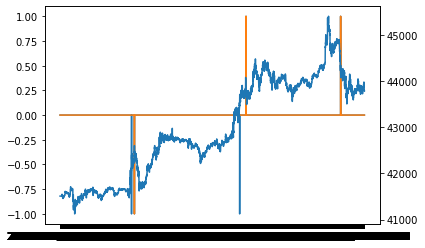

In [9]:
import matplotlib.pyplot as plt

df_mean = pd.DataFrame({'mean_3':df_rates[['Binance_ask', 'Coinbase Pro_ask', 'FTX_ask']].mean(axis='columns')}, index=df.index)
df_mean['mean_4'] = pd.DataFrame({'mean_4':df_rates[['Bybit_ask', 'Binance_ask', 'Coinbase Pro_ask', 'FTX_ask']].mean(axis='columns')})
df_mean = df_mean.applymap(trend_judge)
df_mean['Bybit_tiker'] = df['Bybit_tiker']
df_mean.set_index(pd.to_datetime(df_mean.index, format='%Y-%m-%d %H:%M:%S')).sort_index()

fig = plt.figure()

ax1 = fig.subplots()
ax2 = ax1.twinx()

ax1.plot(df_mean.index , df_mean['mean_3'])
ax1.plot(df_mean.index , df_mean['mean_4'])
ax2.plot(df_mean.index , df_mean['Bybit_tiker'])


plt.show()


In [10]:
df_magi = df_rates[['Bybit_ask', 'Binance_ask', 'Coinbase Pro_ask', 'FTX_ask']].applymap(trend_judge)
df_magi['magi_3'] = df_magi[['Binance_ask', 'Coinbase Pro_ask', 'FTX_ask']].sum(axis='columns')
df_magi['magi_4'] = df_magi[['Bybit_ask', 'Binance_ask', 'Coinbase Pro_ask', 'FTX_ask']].sum(axis='columns')
df_magi.drop(['Bybit_ask', 'Binance_ask', 'Coinbase Pro_ask', 'FTX_ask'], axis='columns', inplace=True)
df_magi['Bybit_tiker'] = df['Bybit_tiker']
df_magi.set_index(pd.to_datetime(df_magi.index, format='%Y-%m-%d %H:%M:%S')).sort_index()

df_magi.to_csv('.\df_magi.csv')

# fig = plt.figure()

# ax1 = fig.subplots()
# ax2 = ax1.twinx()

# ax1.plot(df_magi.index , df_magi['magi_3'])
# # ax1.plot(df_magi.index , df_magi['magi_4'])
# ax2.plot(df_magi.index , df_magi['Bybit_tiker'])


# plt.show()




In [12]:
df_magi['position'] = df_magi['magi_3'] * df_magi['Bybit_tiker']
print(df_magi)

                     magi_3  magi_4  Bybit_tiker  position
time_str                                                  
2022-02-06 20:23:05      -1      -1      41506.5  -41506.5
2022-02-06 20:23:12       0       0      41506.0       0.0
2022-02-06 20:23:19       0       0      41506.5       0.0
2022-02-06 20:23:26       0       0      41506.5       0.0
2022-02-06 20:23:34       0       0      41506.5       0.0
...                     ...     ...          ...       ...
2022/2/8 21:03:49         0       1      43782.0       0.0
2022/2/8 21:03:57         0       0      43782.5       0.0
2022/2/8 21:04:05         0       0      43783.0       0.0
2022/2/8 21:04:13         0       0      43783.0       0.0
2022/2/8 21:04:24         0       0      43783.0       0.0

[21470 rows x 4 columns]
